In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#cargar datos
location = "/Users/raul/Documents/Isaac/uteq/3ro/bd/evaluacion2/beisbol.csv"
datos = pd.read_csv(filepath_or_buffer= location, sep=',', low_memory=False)

In [3]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [4]:
datos.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


In [5]:
datos.shape

(30, 4)

In [6]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['equipos'])], remainder='passthrough')
X = ct.fit_transform(datos[['equipos', 'bateos']])
y = datos['runs'].values.reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [9]:
print(modelo.intercept_)
print(modelo.coef_)

[695.65217391]
[[ 3.53478261e+01 -5.46521739e+01  0.00000000e+00  1.79347826e+02
  -4.16521739e+01  0.00000000e+00  8.34782609e+00  3.93478261e+01
   0.00000000e+00 -7.06521739e+01 -8.06521739e+01  3.43478261e+01
  -5.16521739e+01 -2.86521739e+01  2.53478261e+01 -7.66521739e+01
   2.23478261e+01  1.71347826e+02 -5.06521739e+01  1.73478261e+01
  -8.56521739e+01 -1.25652174e+02  0.00000000e+00 -1.39652174e+02
   6.63478261e+01  0.00000000e+00  1.59347826e+02  4.73478261e+01
   0.00000000e+00  2.92099678e-13]]


In [10]:
# Realiza predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
print(len(y_test), len(y_pred))
print(X_test[:, 1].shape)
print(y_test.shape)

6 6
(6, 1)
(6, 1)


In [11]:
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
datos2

,Actual,Predicted
0,787,695.652174
1,593,695.652174
2,735,695.652174
3,708,695.652174
4,624,695.652174
5,707,695.652174


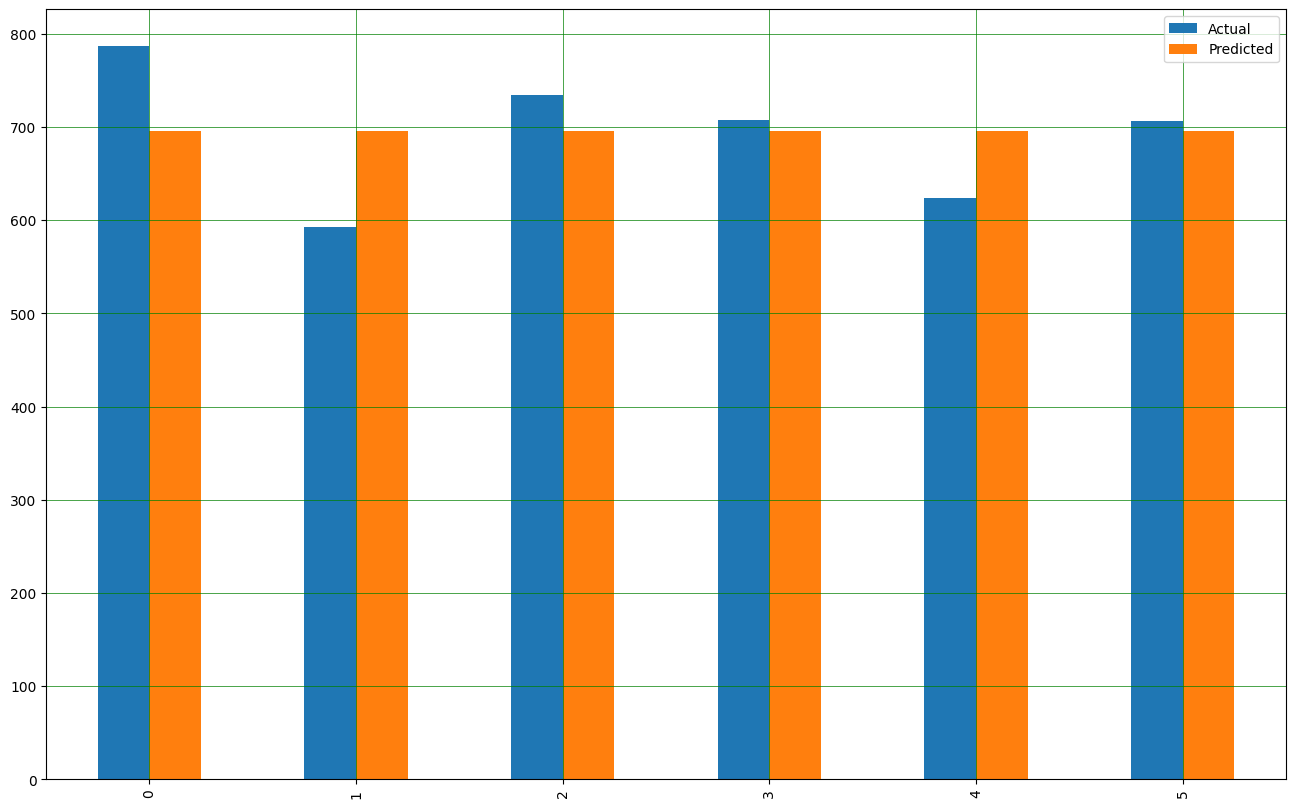

In [12]:
# Gráfica
datos2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
# Métricas de Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
recm = np.sqrt(mse)

In [14]:
# Imprimir métricas
print(f"Error Absoluto Medio: {mae}")
print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")
print(f"Raíz del Error Cuadrático Medio (RECM): {recm}")

Error Absoluto Medio: 54.782608695638395
Error Cuadrático Medio: 4307.570258346772
Coeficiente de Determinación (R²): -0.002563612328246201
Raíz del Error Cuadrático Medio (RECM): 65.63208253854796
